In [269]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [270]:
%load_ext autoreload
%autoreload 2

from pyDO3SE.plugins.carbon_allocation.calculations import *
from pyDO3SE.plugins.carbon_allocation.conversions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [271]:
df = pd.read_csv('examples/spanish_wheat/data/spanish_wheat_data.csv')

In [272]:
df.head()

,mm,mdd,dd,hr,Ts_C,VPD,u,"precip, mm","P, kPa","O3, ppb","PAR, W m-2",LAI
0,1,1,1,0,3.28,0.05699,0.52,0.03,91.86,33.904,0.0,0.0
1,1,1,1,1,3.54,0.07755,0.52,0.03,91.88,32.521,0.0,0.0
2,1,1,1,2,3.41,0.07661,0.52,0.03,91.87,31.771,0.0,0.0
3,1,1,1,3,3.09,0.06531,0.52,0.03,91.86,31.242,0.0,0.0
4,1,1,1,4,3.22,0.07418,0.50,0.03,91.86,30.818,0.0,0.0


In [273]:
df = pd.read_csv('examples/spanish_wheat/output/Latest/pyDO3SE_output_4.11.0c.csv')
# df = df.iloc[2000:4500]
df.head()

,Unnamed: 0,dd,ts_c,par,lai,sai,dvi,photoperiod,PARsun,PARshade,...,rsur,rinc,V_cmax_25,J_max_25,f_LS,LAIsunfrac,component_LAI,V_cmax,J_max,R_d
2000,2000,84,6.76,383.50,0.000419,4.285714,0.063113,13.232216,425.384021,104.698989,...,166.834856,34.210378,180.0,400.0,1.0,0.999684,0.000432,30.365919,123.880687,0.114409
2001,2001,84,11.60,575.03,0.000419,4.285714,0.063113,13.232216,482.263168,122.832849,...,165.223156,31.046412,180.0,400.0,1.0,0.999790,0.000432,51.646456,177.777236,0.168488
2002,2002,84,8.89,725.86,0.000419,4.285714,0.063113,13.232216,509.971844,126.526981,...,165.041631,30.691596,180.0,400.0,1.0,0.999835,0.000432,38.480557,145.563334,0.135879
2003,2003,84,10.24,825.25,0.000419,4.285714,0.063113,13.232216,520.091666,122.572857,...,164.864055,30.344799,180.0,400.0,1.0,0.999856,0.000432,44.602495,160.935099,0.151326
2004,2004,84,13.73,868.34,0.000419,4.285714,0.063113,13.232216,520.894596,118.405532,...,164.690299,30.005750,180.0,400.0,1.0,0.999864,0.000432,64.674024,206.996577,0.198954


<AxesSubplot:>

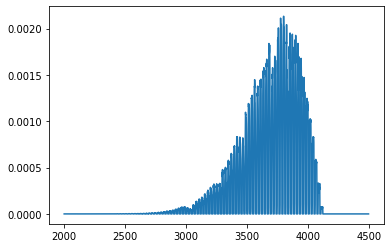

In [274]:
df["npp"].plot()

In [275]:
df_c = df[["A_n_canopy", "c_root", "c_leaf","c_stem", "R_d"]].copy()
df_c.head()

,A_n_canopy,c_root,c_leaf,c_stem,R_d
2000,0.006317,0.000564,0.000007,0.000225,0.114409
2001,0.010755,0.000564,0.000007,0.000225,0.168488
2002,0.008009,0.000564,0.000007,0.000225,0.135879
2003,0.009286,0.000564,0.000007,0.000225,0.151326
2004,0.013473,0.000564,0.000007,0.000225,0.198954


In [276]:
df_c["A_n_canopy_kg"] = [umol_c_to_kg_c(v) for v in  df_c["A_n_canopy"]]
# df_c["R_d_kg"] = [0 for v in  df_c["R_d"]]
df_c["R_d_kg"] = [umol_c_to_kg_c(v) for v in  df_c["R_d"]]


28469.726070332006

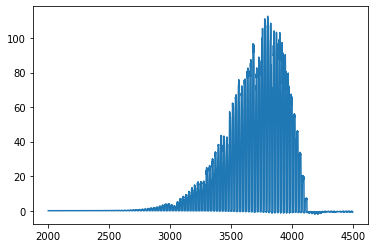

In [277]:
df_c["A_n_canopy"].plot()
df_c["A_n_canopy"].sum()

<AxesSubplot:>

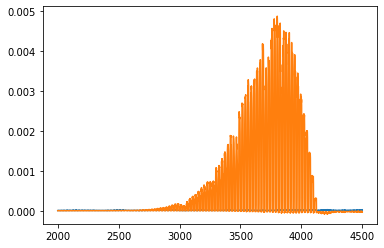

In [278]:
df_c["R_d_kg"].plot()
df_c["A_n_canopy_kg"].plot()

In [279]:
r_g = 0.25
AMULT= 0.02
vals = list(zip(df_c["A_n_canopy_kg"].values*AMULT, df_c["c_root"].values, df_c["c_stem"].values, df_c["c_leaf"].values, df_c["R_d_kg"].values*AMULT))
df_c["npp"] = [max(0, calc_net_prod(a, c_root, c_stem, c_leaf, R_dc, r_g)) for a, c_root, c_stem, c_leaf, R_dc in vals]
df_c.head()

,A_n_canopy,c_root,c_leaf,c_stem,R_d,A_n_canopy_kg,R_d_kg,npp
2000,0.006317,0.000564,0.000007,0.000225,0.114409,2.728980e-07,0.000005,0.0
2001,0.010755,0.000564,0.000007,0.000225,0.168488,4.646185e-07,0.000007,0.0
2002,0.008009,0.000564,0.000007,0.000225,0.135879,3.459889e-07,0.000006,0.0
2003,0.009286,0.000564,0.000007,0.000225,0.151326,4.011447e-07,0.000007,0.0
2004,0.013473,0.000564,0.000007,0.000225,0.198954,5.820229e-07,0.000009,0.0


In [280]:
from itertools import accumulate

In [281]:
df_c["npp_acc_tot"] = list(accumulate(df_c["npp"]))

<AxesSubplot:>

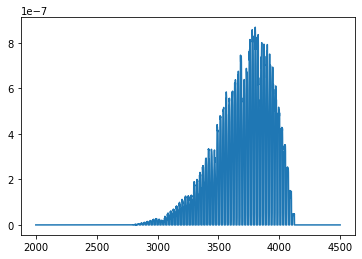

In [282]:
df_c["npp"].plot()

<AxesSubplot:>

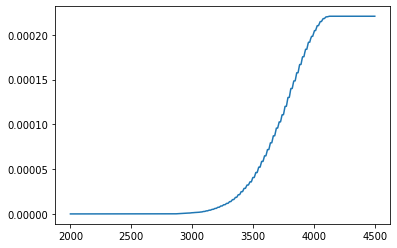

In [283]:
# Should == 1.2
df_c["npp_acc_tot"].plot()

In [284]:
vals[-1]

(-6.273740470558872e-07,
 0.0249162441028804,
 0.113001755438725,
 0.0241006318293414,
 3.902157576537392e-07)

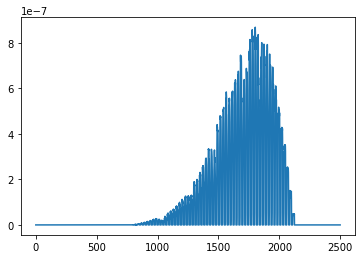

In [285]:
npp = [max(0, calc_net_prod(*v, 0.25)) for v in vals]
plt.plot(npp)

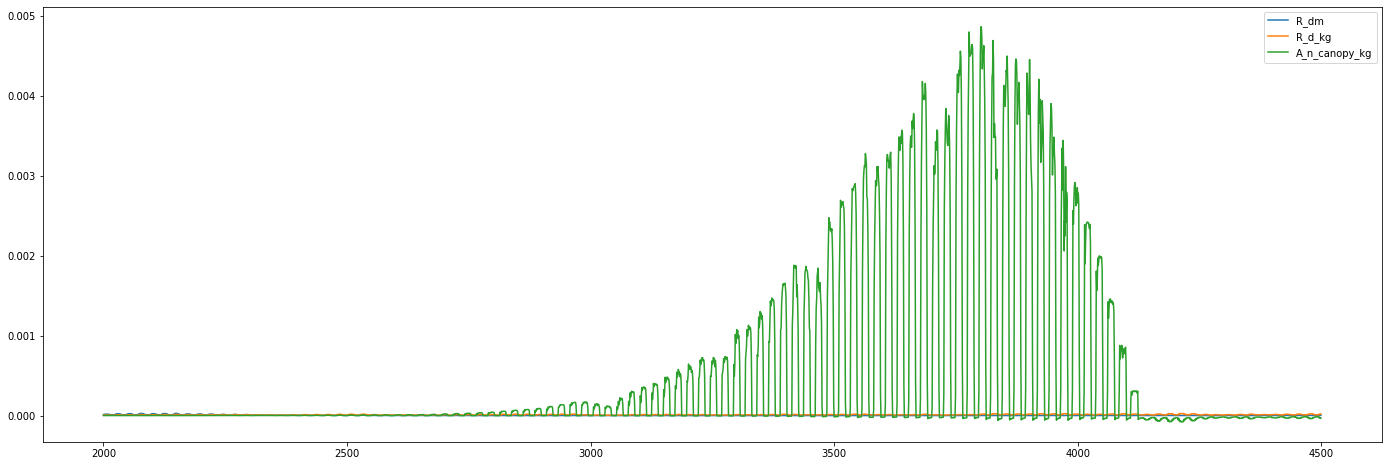

In [286]:
plt.figure(figsize=(24,8))
df_c["R_dm"] = [R_dc * ((c_root + c_stem)/c_leaf) for a, c_root, c_stem, c_leaf, R_dc in vals]
df_c["R_dm"].plot()
df_c["R_d_kg"].plot()
df_c["A_n_canopy_kg"].plot()
plt.legend()

<AxesSubplot:>

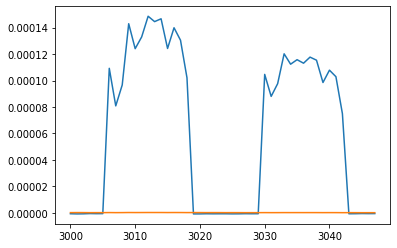

In [287]:
df_c["A_n_canopy_kg"].iloc[1000:1048].plot()
df_c["R_dm"].iloc[1000:1048].plot()

<AxesSubplot:>

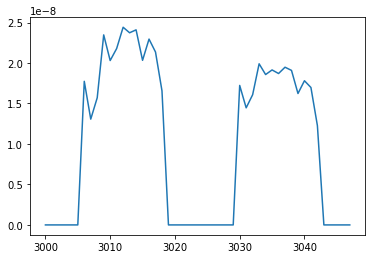

In [288]:
df_c["npp"].iloc[1000:1048].plot()


In [304]:
df_c["npp"].iloc[0:24]

2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
2022    0.0
2023    0.0
Name: npp, dtype: float64

In [308]:
df_c["net_prod_acc"] = np.zeros(24).tolist() + [df_c["npp"].iloc[i:i+24] for i, r in enumerate(df_c["npp"].iloc[0:-24])]

<AxesSubplot:>

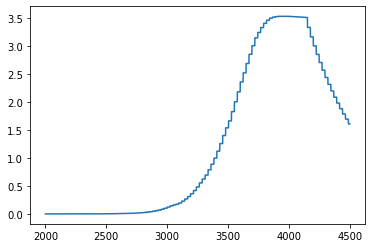

In [289]:
df["lai"].plot()

<AxesSubplot:>

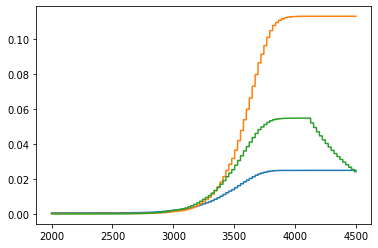

In [290]:
df_c["c_root"].plot()
df_c["c_stem"].plot()
df_c["c_leaf"].plot()

In [303]:
df["net_prod_acc"] = df_c["net_prod_acc"]
df["DVI"] = df["DVI"]
df["c_root"] = df["c_root"]
df["c_stem"] = df["c_stem"]
df["c_leaf"] = df["c_leaf"]
df["c_harv"] = df["c_harv"]
df["c_resv"] = df["c_resv"]
df["a_root"] = df["a_root"]
df["a_leaf"] = df["a_leaf"]
df["a_stem"] = df["a_stem"]
df["b_root"] = df["b_root"]
df["b_leaf"] = df["b_leaf"]
df["b_stem"] = df["b_stem"]
df["theta"] = df["theta"]
df["c_init"] = df["c_init"]
for row in df.iterrows():
    
out = [daily_carbon_allocation(**dict(v[1])) for v in df.iterrows()]

TypeError: daily_carbon_allocation() missing 9 required positional arguments: 'net_prod_acc', 'DVI', 'a_root', 'a_leaf', 'a_stem', 'b_root', 'b_leaf', 'b_stem', and 'theta'